# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV300"

In [58]:
LV_AXIS_THRESHOLD = 1.5 # 3.0
# LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR
1032,REACTOME_REGULATION_OF_APOPTOSIS,300,0.741191,0.000775,0.006283


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP055569, SRP060416, SRP057196, SRP024268, SRP047519, SRP012461, SRP007947, SRP058773, SRP064259, SRP066834, SRP042161, SRP002184, SRP019936, SRP033135, SRP057205, SRP026052, SRP026620, SRP010670, SRP015013, SRP015853, SRP059379, SRP003754, SRP050499, SRP058351, SRP014213, SRP007359, SRP055153, SRP057244, SRP044042, SRP009266, SRP044917, SRP025982, SRP018838, SRP026537, SRP041094, SRP022876, SRP059775, SRP036821, SRP006575, SRP007569, SRP050146, SRP064464, SRP057852, SRP014809, 

/opt/code/libs/data/recount2.py:360: UserWarning: Not all experiments data could be loaded (42 != 44)
  warnings.warn(


In [18]:
lv_data.shape

(7341, 80)

In [19]:
lv_data.head()

cell type tonsil donor  \
project   run                                                         
SRP055569 SRR1821717  MCF10a human breast cancer cells          NaN   
          SRR1821716  MCF10a human breast cancer cells          NaN   
          SRR1821715  MCF10a human breast cancer cells          NaN   
          SRR1821714  MCF10a human breast cancer cells          NaN   
          SRR1821713  MCF10a human breast cancer cells          NaN   

                     facs gating tissue  age c1 chip id  \
project   run                                             
SRP055569 SRR1821717         NaN    NaN  NaN        NaN   
          SRR1821716         NaN    NaN  NaN        NaN   
          SRR1821715         NaN    NaN  NaN        NaN   
          SRR1821714         NaN    NaN  NaN        NaN   
          SRR1821713         NaN    NaN  NaN        NaN   

                     experiment_sample_name gender  tnm agent  ... cell count  \
project   run                                                  ...              
SRP055569 SRR1821717                    NaN    NaN  NaN   NaN  ...        NaN   
          SRR1821716                    NaN    NaN  NaN   NaN  ...        NaN   
          SRR1821715                    NaN    NaN  NaN   NaN  ...        NaN   
          SRR1821714                    NaN    NaN  NaN   NaN  ...        NaN   
          SRR1821713                    NaN    NaN  NaN   NaN  ...        NaN   

                     ercc_mix ercc_dilution collection site and cell type  \
project   run                                                               
SRP055569 SRR1821717      NaN           NaN                           NaN   
          SRR1821716      NaN           NaN                           NaN   
          SRR1821715      NaN           NaN                           NaN   
          SRR1821714      NaN           NaN                           NaN   
          SRR1821713      NaN           NaN                           NaN   

                     bacterial community type chip antibody  \
project   run                                                 
SRP055569 SRR1821717                      NaN           NaN   
          SRR1821716                      NaN           NaN   
          SRR1821715                      NaN           NaN   
          SRR1821714                      NaN           NaN   
          SRR1821713                      NaN           NaN   

                     chip antibody manufacturer chip antibody lot #  \
project   run                                                         
SRP055569 SRR1821717                        NaN                 NaN   
          SRR1821716                        NaN                 NaN   
          SRR1821715                        NaN                 NaN   
          SRR1821714                        NaN                 NaN   
          SRR1821713                        NaN                 NaN   

                     chip antibody catalog #     LV300  
project   run                                           
SRP055569 SRR1821717                     NaN  0.002669  
          SRR1821716                     NaN -0.032847  
          SRR1821715                     NaN -0.045960  
          SRR1821714                     NaN -0.019831  
          SRR1821713                     NaN -0.041122  

[5 rows x 80 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

cell type                                 0.033077
tnm                                       0.008180
biological replicate                      0.003784
agent                                     0.003603
cancer or normal                          0.003203
facs gating                               0.002025
tonsil donor                              0.002025
age                                       0.001956
dilutions of the malignant b-cell line    0.001896
c1 chip id                                0.001587
experiment_sample_name                    0.001587
antibody                                  0.001522
antibody vendor                           0.001522
antibody cat. #                           0.001522
health status                             0.001495
cell type subset                          0.001495
well number                               0.001358
reprogramming time point (day)            0.001358
ar-v7 status                              0.001150
therapy                        

In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

cell type         0.033077
tissue            0.001078
tissue type       0.000526
tissue subtype    0.000220
dtype: float64

In [22]:
_tmp = lv_data.loc[
    :,
    [
        # "cell line",
        "cell type",
        "tissue type",
        "tissue",
        # "tissue subtype",
        # "tissue type",
        LV_NAME,
    ],
]

In [23]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [24]:
_tmp_seq[0]

cell type  \
project   run                                                             
SRP055569 SRR2019142  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019086                  WI-38 human lung fibroblast cells   
          SRR2019096                  WI-38 human lung fibroblast cells   
          SRR2019007                             U87 human glioma cells   
          SRR2019067                  WI-38 human lung fibroblast cells   
          SRR2019170  mixture of U87 human glioma cells and WI-38 hu...   
SRP060416 SRR2088207                       tonsil Innate lymphoid cells   
SRP055569 SRR2018996                             U87 human glioma cells   
SRP060416 SRR2088286                       tonsil Innate lymphoid cells   
SRP055569 SRR2019210  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019145  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019158  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019152  mixture of U87 human glioma cells and WI-38 hu...   
SRP057196 SRR1974775                                            neurons   
SRP055569 SRR1821461  mixture of U87 human glioma cells and MCF10a h...   
SRP024268 SRR886372                                                 NaN   
SRP055569 SRR1821608  mixture of U87 human glioma cells and MCF10a h...   
SRP047519 SRR1586418                                 primary fibroblast   
SRP012461 SRR490412                                         Fibroblasts   
SRP055569 SRR2019160  mixture of U87 human glioma cells and WI-38 hu...   
SRP024268 SRR886384                                                 NaN   
SRP060416 SRR2088229                       tonsil Innate lymphoid cells   
SRP055569 SRR2019198  mixture of U87 human glioma cells and WI-38 hu...   
          SRR1821646                   MCF10a human breast cancer cells   
SRP007947 SRR333720                                     testicular germ   

                     tissue type        tissue      LV300  
project   run                                              
SRP055569 SRR2019142         NaN           NaN  10.872481  
          SRR2019086         NaN           NaN   1.122521  
          SRR2019096         NaN           NaN   0.768775  
          SRR2019007         NaN           NaN   0.512808  
          SRR2019067         NaN           NaN   0.483599  
          SRR2019170         NaN           NaN   0.426912  
SRP060416 SRR2088207         NaN           NaN   0.403341  
SRP055569 SRR2018996         NaN           NaN   0.376274  
SRP060416 SRR2088286         NaN           NaN   0.355089  
SRP055569 SRR2019210         NaN           NaN   0.335912  
          SRR2019145         NaN           NaN   0.323871  
          SRR2019158         NaN           NaN   0.317932  
          SRR2019152         NaN           NaN   0.283666  
SRP057196 SRR1974775         NaN        cortex   0.282942  
SRP055569 SRR1821461         NaN           NaN   0.278403  
SRP024268 SRR886372          NaN  renal pelvis   0.269453  
SRP055569 SRR1821608         NaN           NaN   0.268305  
SRP047519 SRR1586418         NaN      foreskin   0.263456  
SRP012461 SRR490412          NaN           NaN   0.247326  
SRP055569 SRR2019160         NaN           NaN   0.243537  
SRP024268 SRR886384          NaN  renal pelvis   0.242563  
SRP060416 SRR2088229         NaN           NaN   0.242482  
SRP055569 SRR2019198         NaN           NaN   0.230113  
          SRR1821646         NaN           NaN   0.216147  
SRP007947 SRR333720          NaN           NaN   0.208269

In [25]:
# # what is there in these projects?
# lv_data.loc[["SRP011422"]].dropna(how="all", axis=1).sort_values(
#     LV_NAME, ascending=False
# ).sort_values(LV_NAME, ascending=False).head(10)

In [26]:
SELECTED_ATTRIBUTE = "cell type"

In [27]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["tissue"]

## Get plot data

In [59]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [60]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [61]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [62]:
plot_data.head(20)

cell type  \
project   run                                                             
SRP055569 SRR2019142  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019086                  WI-38 human lung fibroblast cells   
          SRR2019096                  WI-38 human lung fibroblast cells   
          SRR2019007                             U87 human glioma cells   
          SRR2019067                  WI-38 human lung fibroblast cells   
          SRR2019170  mixture of U87 human glioma cells and WI-38 hu...   
SRP060416 SRR2088207                       tonsil Innate lymphoid cells   
SRP055569 SRR2018996                             U87 human glioma cells   
SRP060416 SRR2088286                       tonsil Innate lymphoid cells   
SRP055569 SRR2019210  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019145  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019158  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019152  mixture of U87 human glioma cells and WI-38 hu...   
SRP057196 SRR1974775                                            neurons   
SRP055569 SRR1821461  mixture of U87 human glioma cells and MCF10a h...   
SRP024268 SRR886372                                        renal pelvis   
SRP055569 SRR1821608  mixture of U87 human glioma cells and MCF10a h...   
SRP047519 SRR1586418                                 primary fibroblast   
SRP012461 SRR490412                                         Fibroblasts   
SRP055569 SRR2019160  mixture of U87 human glioma cells and WI-38 hu...   

                          LV300  
project   run                    
SRP055569 SRR2019142  10.872481  
          SRR2019086   1.122521  
          SRR2019096   0.768775  
          SRR2019007   0.512808  
          SRR2019067   0.483599  
          SRR2019170   0.426912  
SRP060416 SRR2088207   0.403341  
SRP055569 SRR2018996   0.376274  
SRP060416 SRR2088286   0.355089  
SRP055569 SRR2019210   0.335912  
          SRR2019145   0.323871  
          SRR2019158   0.317932  
          SRR2019152   0.283666  
SRP057196 SRR1974775   0.282942  
SRP055569 SRR1821461   0.278403  
SRP024268 SRR886372    0.269453  
SRP055569 SRR1821608   0.268305  
SRP047519 SRR1586418   0.263456  
SRP012461 SRR490412    0.247326  
SRP055569 SRR2019160   0.243537

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [63]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # "human bone marrow sample": "bone marrow",
            "whole blood": "Whole blood",
            # "peripheral blood": "Peripheral blood",
            # "peripheral whole blood": "Peripheral blood",
            # "breast cancer": "Breast cancer",
            # "breast cancer cell line": "Breast cancer",
            # SRP057196
            # "fetal_replicating": "Fetal neurons (replicating)",
            # "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [64]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [65]:
_srp_code = "SRP060416"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [66]:
# _srp_code = "SRP059172"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'group']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [67]:
# _srp_code = "SRP062966"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'disease status']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [68]:
_srp_code = "SRP064464"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"Pancreatic islets"
    + f" ({lv_data.loc[(_srp_code, x.name), 'assigned cell type']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [69]:
# _srp_code = "SRP029990" # these cases seem to be the same in SRP032775 and are just a few
# final_plot_data = final_plot_data.drop((_srp_code,))

In [70]:
# _srp_code = "SRP032775" # this one is also about Maralia

# main_attr = "time point"
# second_attrs = ["time-point"]

# def _apply_func(x):
#     return "Whole blood" + f" ({x[main_attr].lower()}, Malaria)"

# _lv_data = lv_data.loc[(_srp_code,), [main_attr] + second_attrs + [LV_NAME]]
# _new_column = _lv_data[[main_attr] + second_attrs].fillna(
#     method="backfill", axis=1
# )[main_attr]
# _lv_data[main_attr] = _new_column
# # _lv_data = _lv_data.drop(columns=second_attrs)

# _tmp = _lv_data.apply(
#     _apply_func,
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [71]:
# _srp_code = "SRP059039"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'group']} cases)",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [72]:
# _srp_code = "SRP056443"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: x[SELECTED_ATTRIBUTE]
#     + f" ({lv_data.loc[(_srp_code, x.name), 'time']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [73]:
# _srp_code = "SRP056840"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Whole blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'sirs outcomes']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [74]:
# _srp_code = "SRP050000"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood (SIRS or sepsis)",
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'sirs outcomes']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [75]:
# _srp_code = "SRP045500"
# _tmp = lv_data.loc[(_srp_code,)].apply(
#     lambda x: x["celltype"],
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'sirs outcomes']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [76]:
_srp_code = "SRP057196"
_tmp = lv_data.loc[(_srp_code,)].apply(
    lambda x: x["tissue"]
    + f" ({lv_data.loc[(_srp_code, x.name), 'cell type']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

/tmp/ipykernel_803/3922095706.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  _tmp = lv_data.loc[(_srp_code,)].apply(


In [77]:
# _srp_code = "SRP058773"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: f"Fibroblasts",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [78]:
_srp_code = "SRP050499"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"Primordial germ cells (PGC)",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [79]:
# _srp_code = "SRP027015"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood (MM.1S)",
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [80]:
# _srp_code = "SRP061329"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [81]:
# _srp_code = "SRP018838"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [82]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [83]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [84]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [85]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [86]:
len(attr_order)

15

In [87]:
attr_order[:5]

['Glioma + WI-38 lung fibroblast cells',
 'WI-38 human lung fibroblast cells',
 'U87 human glioma cells',
 'tonsil Innate lymphoid cells (ILC3)',
 'cortex (neurons)']

## Plot

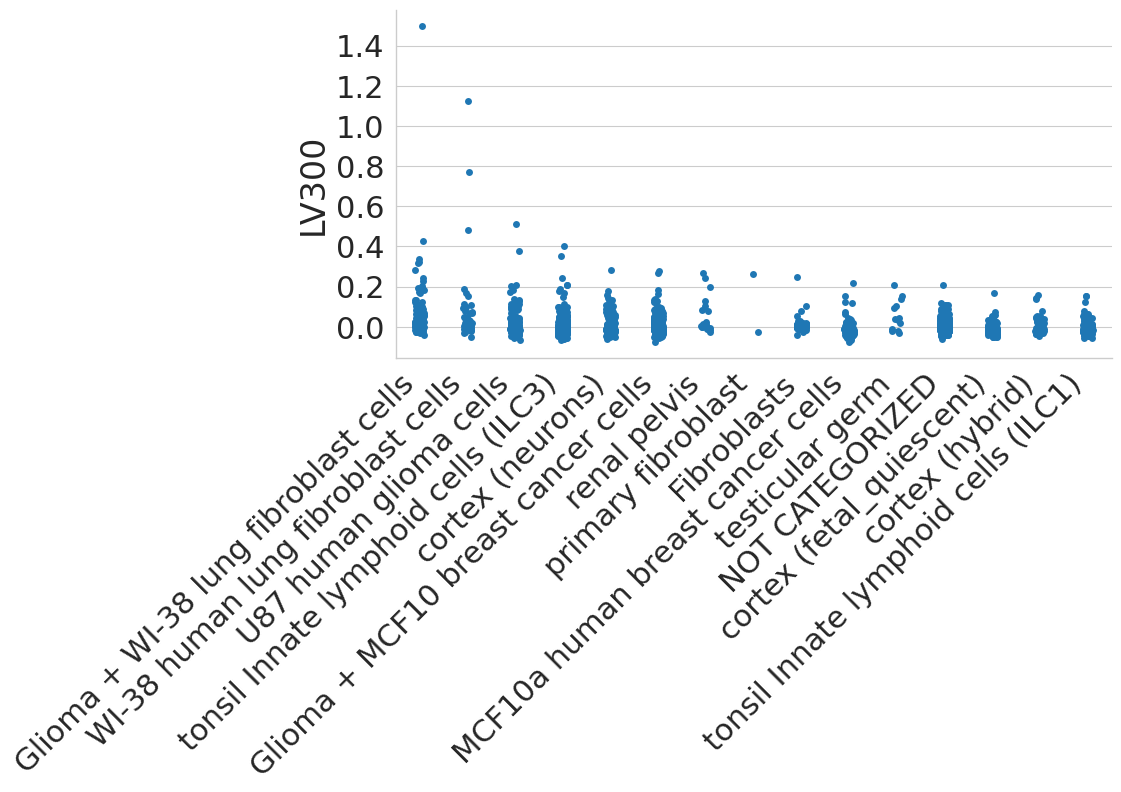

In [88]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [100]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [101]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("^neurons$")].sort_values(LV_NAME, ascending=False)
    display(_tmp.head(20))

,,cell type,LV383
project,run,,


In [157]:
# what is there in these projects?
_tmp = lv_data.loc[["SRP057196"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
)

display(_tmp.head(60))

cell type       tissue                 age  \
project   run                                                              
SRP057196 SRR1974810            neurons       cortex  postnatal 21 years   
          SRR1974896  fetal_replicating       cortex    prenatal 16-18 W   
          SRR1974888  fetal_replicating       cortex    prenatal 16-18 W   
          SRR1974761        endothelial       cortex  postnatal 63 years   
          SRR1974690   oligodendrocytes       cortex  postnatal 50 years   
          SRR1974999    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974720         astrocytes       cortex  postnatal 50 years   
          SRR1974760   oligodendrocytes       cortex  postnatal 63 years   
          SRR1974790   oligodendrocytes  hippocampus  postnatal 63 years   
          SRR1974805   oligodendrocytes       cortex  postnatal 21 years   
          SRR1974957    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974780            neurons       cortex  postnatal 63 years   
          SRR1974620            neurons       cortex  postnatal 37 years   
          SRR1974547             hybrid       cortex  postnatal 54 years   
          SRR1974590          microglia  hippocampus  postnatal 54 years   
          SRR1974914  fetal_replicating       cortex    prenatal 16-18 W   
          SRR1974762            neurons       cortex  postnatal 63 years   
          SRR1974962    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974717         astrocytes       cortex  postnatal 50 years   
          SRR1974579                OPC  hippocampus  postnatal 54 years   
          SRR1974708             hybrid       cortex  postnatal 50 years   
          SRR1974743         astrocytes       cortex  postnatal 50 years   
          SRR1974995    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974886  fetal_replicating       cortex    prenatal 16-18 W   
          SRR1974894  fetal_replicating       cortex    prenatal 16-18 W   
          SRR1974787            neurons       cortex  postnatal 63 years   
          SRR1974826             hybrid       cortex  postnatal 21 years   
          SRR1974850             hybrid       cortex  postnatal 21 years   
          SRR1974657            neurons       cortex  postnatal 37 years   
          SRR1974993    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974631            neurons       cortex  postnatal 37 years   
          SRR1974656            neurons       cortex  postnatal 37 years   
          SRR1974893    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974638            neurons       cortex  postnatal 37 years   
          SRR1974716             hybrid       cortex  postnatal 50 years   
          SRR1974839   oligodendrocytes       cortex  postnatal 21 years   
          SRR1974836   oligodendrocytes       cortex  postnatal 21 years   
          SRR1974699         astrocytes       cortex  postnatal 50 years   
          SRR1974640            neurons       cortex  postnatal 37 years   
          SRR1974591          microglia  hippocampus  postnatal 54 years   
          SRR1974834   oligodendrocytes       cortex  postnatal 21 years   
          SRR1974703         astrocytes       cortex  postnatal 50 years   
          SRR1974919    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974943    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974543   oligodendrocytes       cortex  postnatal 54 years   
          SRR1974960    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974890  fetal_replicating       cortex    prenatal 16-18 W   
          SRR1974605            neurons       cortex  postnatal 37 years   
          SRR1974795   oligodendrocytes  hippocampus  postnatal 63 years   
          SRR1974937    fetal_quiescent       cortex    prenatal 16-18 W   
          SRR1974974    fetal_quiescent       cortex    prenatal 16-18 W   
  

In [ ]:
_tmp["sirs outcomes"].value_counts()

# Reduced plot

## Data stats

In [ ]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

In [ ]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

In [ ]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

In [ ]:
final_plot_data.shape

In [ ]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [ ]:
final_plot_data.shape

## Set x-axis order

In [ ]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [ ]:
len(attr_order)

In [ ]:
attr_order[:5]

## Plot

In [ ]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )